# Sports Analytics Final Project
### John Eastman & Jack Flores

# Does Defense Still Win Championships?

In [39]:
import pandas as pd
import requests, re, math
from bs4 import BeautifulSoup, Comment
import time
import matplotlib.pyplot as plt
import numpy as np

# globals
# 1991 to 2023
YEARS = [y for y in range(1998, 2024)]
PRELINK = "https://www.basketball-reference.com"

#### Demonstrate how NBA playoff games have become higher scoring over time.

Start by scraping NBA playoff data from www.basketball-reference.com.
Extract Avg. Points Per Game (PPG) and Years from scraped data.

In [40]:
def make_link (year):
    return f"https://www.basketball-reference.com/playoffs/NBA_{year}.html"


In [41]:
pts_year = {}

for year in YEARS:
    page = requests.get(make_link(year))
    time.sleep(2)
    soup = BeautifulSoup(page.content, "html.parser")
    table = soup.find("table", {"id": "per_game-team"})
    footer = table.find('tfoot')
    last_row = [td.text.strip() for td in footer.find_all('td')]
    
    pts_year[year] = last_row[-1]

print(pts_year)

{1998: '91.2', 1999: '87.6', 2000: '91.8', 2001: '93.6', 2002: '94.2', 2003: '96.0', 2004: '88.0', 2005: '97.1', 2006: '97.8', 2007: '94.2', 2008: '94.9', 2009: '96.7', 2010: '97.5', 2011: '94.0', 2012: '92.8', 2013: '95.2', 2014: '99.5', 2015: '100.5', 2016: '99.8', 2017: '106.0', 2018: '104.4', 2019: '107.7', 2020: '109.6', 2021: '110.3', 2022: '106.3', 2023: '109.6'}


Plot the trend of PPG in the NBA Playoffs over Time (1991-2023).

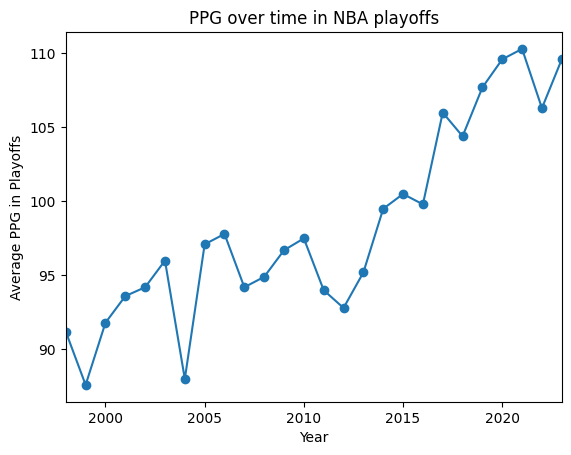

In [42]:
Year = [int(x) for x in list(pts_year.keys())]
ppg = [float(x) for x in list(pts_year.values())]

plt.plot(Year, ppg, marker='o')
plt.xlabel('Year')
plt.ylabel('Average PPG in Playoffs')
plt.title('PPG over time in NBA playoffs')
plt.xlim(YEARS[0], YEARS[-1]) 
plt.show()

#### Find points per possession. (PPG / Pace)

In [43]:
FINALS = []
for year in YEARS:
    page = requests.get(make_link(year))
    time.sleep(2)
    soup = BeautifulSoup(page.content, "html.parser")
    table = soup.find("table", {"id": "all_playoffs"})
    link = table.find('a', string='Series Stats')['href']
    finals = PRELINK + link
    FINALS.append(finals)

In [44]:
finals_data = []
for i, final in enumerate(FINALS):
    page = requests.get(final)
    time.sleep(2)
    soup = BeautifulSoup(page.content, "html.parser")
    comment = soup.find(string=lambda text: isinstance(text, Comment) and 'four_factors' in text)
    # Parse the content of the comment as HTML
    if comment:
        comment_soup = BeautifulSoup(comment, 'html.parser')
        
        # Extract the table
        table = comment_soup.find('table', {'id': 'four_factors'})

        # Find all rows in the table body
        rows = table.select('#four_factors tbody tr')

        # Iterate over each row to extract data
        for row in rows:
            team_name = row.find('a').text.strip()  # Extract team name
            pace = row.find(attrs={'data-stat': 'pace'}).text.strip()  # Extract pace
            pts = row.find(attrs={'data-stat': 'pts'}).text.strip()  # Extract points
            # Create a dictionary to store the data for this row
            team_data = {
                'year': YEARS[i],  # Replace with the actual year
                'team_name': team_name,
                'pace': pace,
                'pts': pts
            }
            finals_data.append(team_data)            

In [45]:
print(finals_data)
pts_per_possession_list = []
for data in finals_data:
    pace = data['pace']
    pts = data['pts']
    
    # Calculate points per possession
    pts_per_possession = float(pts) / float(pace)
    
    # Append values to the respective lists
    pts_per_possession_list.append(pts_per_possession)

[{'year': 1998, 'team_name': 'CHI', 'pace': '82.0', 'pts': '88.0'}, {'year': 1998, 'team_name': 'UTA', 'pace': '82.0', 'pts': '80.2'}, {'year': 1999, 'team_name': 'SAS', 'pace': '85.7', 'pts': '84.8'}, {'year': 1999, 'team_name': 'NYK', 'pace': '85.7', 'pts': '79.8'}, {'year': 2000, 'team_name': 'LAL', 'pace': '91.5', 'pts': '104.8'}, {'year': 2000, 'team_name': 'IND', 'pace': '91.5', 'pts': '106.7'}, {'year': 2001, 'team_name': 'LAL', 'pace': '89.6', 'pts': '100.6'}, {'year': 2001, 'team_name': 'PHI', 'pace': '89.6', 'pts': '93.8'}, {'year': 2002, 'team_name': 'LAL', 'pace': '90.9', 'pts': '106.0'}, {'year': 2002, 'team_name': 'NJN', 'pace': '90.9', 'pts': '96.8'}, {'year': 2003, 'team_name': 'SAS', 'pace': '87.8', 'pts': '87.8'}, {'year': 2003, 'team_name': 'NJN', 'pace': '87.8', 'pts': '82.0'}, {'year': 2004, 'team_name': 'DET', 'pace': '83.4', 'pts': '90.8'}, {'year': 2004, 'team_name': 'LAL', 'pace': '83.4', 'pts': '81.8'}, {'year': 2005, 'team_name': 'SAS', 'pace': '80.8', 'pts':

[1998, 1998, 1999, 1999, 2000, 2000, 2001, 2001, 2002, 2002, 2003, 2003, 2004, 2004, 2005, 2005, 2006, 2006, 2007, 2007, 2008, 2008, 2009, 2009, 2010, 2010, 2011, 2011, 2012, 2012, 2013, 2013, 2014, 2014, 2015, 2015, 2016, 2016, 2017, 2017, 2018, 2018, 2019, 2019, 2020, 2020, 2021, 2021, 2022, 2022, 2023, 2023]
[1.0731707317073171, 0.9780487804878049, 0.9894982497082846, 0.9311551925320887, 1.1453551912568305, 1.166120218579235, 1.1227678571428572, 1.046875, 1.166116611661166, 1.0649064906490648, 1.0, 0.9339407744874716, 1.0887290167865706, 0.9808153477218224, 1.050742574257426, 1.0730198019801982, 1.0276854928017718, 1.0166112956810631, 1.0446859903381642, 0.9722222222222222, 1.1305309734513274, 1.0376106194690264, 1.1549942594718714, 1.0470723306544203, 1.0608899297423886, 1.0199063231850116, 1.1076023391812866, 1.07953216374269, 1.1512415349887133, 1.1060948081264108, 1.1010215664018161, 1.108967082860386, 1.2082379862700228, 1.0480549199084668, 1.1102535832414553, 1.030871003307607

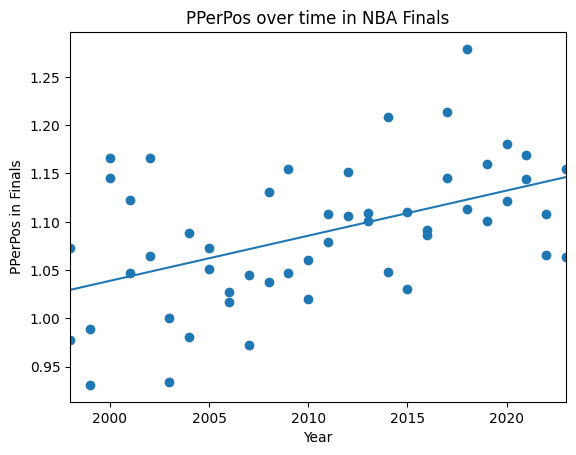

In [46]:
finals_years = [year for year in YEARS for _ in range(2)]
print(finals_years)
print(pts_per_possession_list)

# create scatterplot
plt.scatter(finals_years, pts_per_possession_list)

# calculate equation for trendline
z = np.polyfit(finals_years, pts_per_possession_list, 1)
p = np.poly1d(z)

# add trendline to plot
plt.plot(YEARS, p(YEARS))

plt.xlabel('Year')
plt.ylabel('PPerPos in Finals')
plt.title('PPerPos over time in NBA Finals')
plt.xlim(YEARS[0], YEARS[-1]) 
plt.show()